In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
from pymatgen.core import Structure 
from nebula.generate import InterstitialNEB

In [14]:
supercell = Structure.from_file('POSCAR')*[3,3,2]
supercell.lattice.abc

(13.678227857180952, 13.678227857180952, 14.886216052355561)

In [4]:
ineb = InterstitialNEB()
possibilities = ineb.get_interstitial_neb_mappings(
    supercell = supercell,
    desired_interstitial_specie='Ag',
    neb_distance_cutoff = 4,
)

Generating DefectEntry objects: 100.0%|██████████| [00:00,  135.83it/s]



2 interstitial(s) found from doped:
 - ['Ag_i_C3v_Ag2.67_0', 'Ag_i_C3v_Ag2.98_0']
            

3 pathways found:
                 site1              site2 direction
0    Ag_i_C3v_Ag2.67_0  Ag_i_C3v_Ag2.67_0         c
2    Ag_i_C3v_Ag2.67_0  Ag_i_C3v_Ag2.98_0         c
108  Ag_i_C3v_Ag2.98_0  Ag_i_C3v_Ag2.98_0         c
              


In [5]:
from chgnet.model import CHGNetCalculator
from nebula.relax import NEBulaRelax

cnc = CHGNetCalculator()
nebrelax = NEBulaRelax(asecalculator = cnc)
energy, fstruct = nebrelax.relax(supercell)

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on mps
       Step     Time          Energy          fmax
MDMin:    0 15:19:01     -185.066826        0.010582


In [15]:
ineb = InterstitialNEB()
possibilities = ineb.get_interstitial_neb_mappings(
    supercell = fstruct,
    desired_interstitial_specie='Ag',
    neb_distance_cutoff = 3,
)

Generating DefectEntry objects: 100.0%|██████████| [00:00,  337.38it/s]



2 interstitial(s) found from doped:
 - ['Ag_i_C3v_Ag2.67_0', 'Ag_i_C3v_Ag2.98_0']
            

1 pathways found:
               site1              site2 direction
0  Ag_i_C3v_Ag2.67_0  Ag_i_C3v_Ag2.98_0         c
              


In [16]:
ims = []
for poss in possibilities.values():
    _images = nebrelax.nebrun(poss['init_structure'],poss['final_structure'],relax_endpoints=False) #
    ims.append(_images)

       Step     Time          Energy          fmax
MDMin:    0 15:24:15     -186.908087        1.270072
MDMin:    1 15:24:17     -187.022539        0.975261
MDMin:    2 15:24:19     -187.198377        0.414169
MDMin:    3 15:24:20     -187.281136        0.273335
MDMin:    4 15:24:22     -187.320540        0.278535
MDMin:    5 15:24:24     -187.341356        0.165624
MDMin:    6 15:24:26     -187.353226        0.204392
MDMin:    7 15:24:28     -187.360570        0.143638
MDMin:    8 15:24:29     -187.365722        0.158814
MDMin:    9 15:24:31     -187.369360        0.131699
MDMin:   10 15:24:33     -187.372701        0.134226
MDMin:   11 15:24:35     -187.376339        0.121095
MDMin:   12 15:24:37     -187.380429        0.125259
MDMin:   13 15:24:39     -187.384867        0.112871
MDMin:   14 15:24:41     -187.389044        0.138330
MDMin:   15 15:24:43     -187.393361        0.112498
MDMin:   16 15:24:44     -187.397607        0.134110
MDMin:   17 15:24:46     -187.401175        0.12

In [17]:
ims.append(nebrelax.nebrun(poss['init_structure'],poss['final_structure'],relax_endpoints=True))

       Step     Time          Energy          fmax
MDMin:    0 15:25:15     -186.912229        1.157079
MDMin:    1 15:25:15     -187.033104        0.898526
MDMin:    2 15:25:15     -187.218915        0.309176
MDMin:    3 15:25:15     -187.300090        0.204740
MDMin:    4 15:25:16     -187.327745        0.108001
MDMin:    5 15:25:16     -187.343688        0.096356
       Step     Time          Energy          fmax
MDMin:    0 15:25:16     -187.411653        0.109053
MDMin:    1 15:25:16     -187.414977        0.107390
MDMin:    2 15:25:16     -187.423436        0.097381
       Step     Time          Energy          fmax
MDMin:    0 15:25:17     -187.283990        0.374126
MDMin:    1 15:25:19     -187.292727        0.326833
MDMin:    2 15:25:21     -187.313300        0.207667
MDMin:    3 15:25:23     -187.333837        0.154739
MDMin:    4 15:25:24     -187.347204        0.129425
MDMin:    5 15:25:26     -187.360901        0.117666
MDMin:    6 15:25:28     -187.372684        0.103102

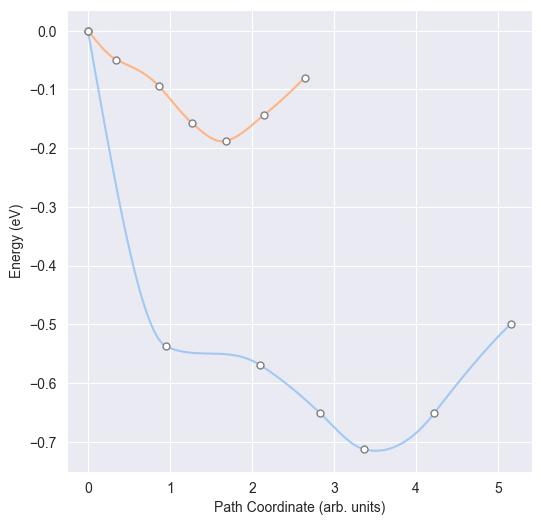

In [18]:
from nebula.plotting import NEBulaPlotter
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style('darkgrid')
sns.set_palette('pastel')

fig,ax = plt.subplots(figsize=(6,6),dpi=100)
nebplot = NEBulaPlotter()

for i,neb in enumerate(ims):
    nebplot.nebanalysis(neb)
    ax = nebplot.plot_neb(ax=ax)

#### 1. Initialise INeb and relax using CHGNet (optional)

In [ ]:
ineb = INeb()
energy,structure = ineb.chgnet_relax(structure=struct,**{'steps':1,'fmax':0.1,'relax_model':'MDMin'})
energy

### 2. generate interstitial mappings using Doped (https://github.com/SMTG-Bham/doped)

In [ ]:
mappings = ineb.get_interstitial_neb_mappings(structure,relax_with_chgnet=False)

### 3. generate interstitialcy mappings based on the interstitial pathways found

In [ ]:
mappings_intcy = ineb.get_interstitialcy_neb_mappings(structure,passthrough_search_radius=3)

In [ ]:
'''
save the interstitial images as POSCAR files to run with VASP 
'''
# ineb.save_interstitial_VASP(location='interstitial',nimages=5)

In [ ]:
'''
save the interstitialcy images as POSCAR files to run with VASP 
'''
# ineb.save_interstitialcy_VASP(location='interstitialcy',nimages=5)

### 4. you can also run a simple NEB using CHGNet (https://chgnet.lbl.gov) as the calculator through ASE (https://wiki.fysik.dtu.dk/ase/). 

#### 4a Interstitial NEB

In [ ]:
'''relax the end points first '''
_,ii = ineb.chgnet_relax(mappings[2592]['init_structure'],fmax=0.5)
_,ff = ineb.chgnet_relax(mappings[2592]['final_structure'],fmax=0.5)

In [ ]:
'''now the NEB calcualtion'''
neb = ineb.chgnet_nebrun(ii,ff,nimages=3,fmax=0.5)

In [ ]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools
fig,ax = plt.subplots(figsize=(4,4),dpi=100)
nebtools = NEBTools(neb)
Ef, dE = nebtools.get_barrier()
fit = nebtools.get_fit()
ax.plot(fit[2], fit[3])
ax.plot(fit[0], fit[1], **{'marker': 'o',
                           'linestyle': 'None',
                           'color': 'grey',
                           'markerfacecolor': 'white',
                           'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
plt.show()

#### 4b Interstitialcy NEB

In [ ]:
'''relax the end points first '''
_,ii = ineb.chgnet_relax(mappings_intcy[2592][0]['init_structure'],fmax=0.5)
_,ff = ineb.chgnet_relax(mappings_intcy[2592][0]['final_structure'],fmax=0.5)

In [ ]:
'''now the NEB calcualtion'''
neb_intcy = ineb.chgnet_nebrun(ii,ff,nimages=3,fmax=0.5)

In [ ]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools
fig,ax = plt.subplots(figsize=(4,4),dpi=100)
nebtools = NEBTools(neb_intcy)
Ef, dE = nebtools.get_barrier()
fit = nebtools.get_fit()
ax.plot(fit[2], fit[3])
ax.plot(fit[0], fit[1], **{'marker': 'o',
                           'linestyle': 'None',
                           'color': 'grey',
                           'markerfacecolor': 'white',
                           'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
plt.show()

#### 4c plot them together

In [ ]:
'''and now plot the result'''
try:
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.set_palette('pastel')
except Exception:
    pass 
import matplotlib.pyplot as plt 
from ase.neb import NEBTools

labels = {0:'interstitial',1:'interstitialcy'}

fig,ax = plt.subplots(figsize=(4,4),dpi=100)
for i,calc in enumerate([neb,neb_intcy]):
    nebtools = NEBTools(calc)
    Ef, dE = nebtools.get_barrier()
    fit = nebtools.get_fit()
    ax.plot(fit[2], fit[3],label=labels[i])
    ax.plot(fit[0], fit[1], **{'marker': 'o',
                               'linestyle': 'None',
                               'color': 'grey',
                               'markerfacecolor': 'white',
                               'markersize': 5})
ax.set_ylabel('energy (eV)')
ax.set_xlabel('path coordinate (arb. units)')
ax.legend(edgecolor='black')
plt.show()